# Regression Lineaire from scratch

- Normalize features ($\mu$, $\sigma$)
- Cost functions ()
- Gradient descent ()

m : number of observations in the training data set.  
n : features
iterations = 1000  
delta = 0.001  
alpha = 0.03

J(w) = $\frac{1}{2m}$ $\sum_{i=1}^{nb}$ ( h<sub>w</sub> (x<sup>(i)</sup>) - y<sup>(i)</sup> )<sup>2</sup>

Gradient descent:   
Repeat until convergence  
w<sub>k</sub> = w<sub>k</sub> - $\frac{lamda}{m}$ $\sum_{i=1}^{nb}$ ( h<sub>w</sub> (x<sup>(i)</sup>) - y<sup>(i)</sup> ) x<sub>k</sub><sup>(i)</sup>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
xls = pd.ExcelFile('./Folds5x2_pp.xlsx')
df1 = pd.read_excel(xls, 'Sheet1')
df2 = pd.read_excel(xls, 'Sheet2')
df3 = pd.read_excel(xls, 'Sheet3')
df4 = pd.read_excel(xls, 'Sheet4')
df5 = pd.read_excel(xls, 'Sheet5')

m = len(df1)
n_features = 4
n_iter = 1000
delta = 0.01
learning_rate = 0.03

w = np.ones((n_features + 1, 1))

X = np.array((np.ones((m)),  df1['AT'], df1['V'], df1['AP'], df1['RH'])).T
Y = df1['PE'].values

print("Total samples in our dataset is: {}".format(X.shape[0]))

Total samples in our dataset is: 9568


In [3]:
print(w.shape, w)
print(X.shape, X)

(5, 1) [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(9568, 5) [[1.00000e+00 1.49600e+01 4.17600e+01 1.02407e+03 7.31700e+01]
 [1.00000e+00 2.51800e+01 6.29600e+01 1.02004e+03 5.90800e+01]
 [1.00000e+00 5.11000e+00 3.94000e+01 1.01216e+03 9.21400e+01]
 ...
 [1.00000e+00 3.13200e+01 7.43300e+01 1.01292e+03 3.64800e+01]
 [1.00000e+00 2.44800e+01 6.94500e+01 1.01386e+03 6.23900e+01]
 [1.00000e+00 2.16000e+01 6.25200e+01 1.01723e+03 6.78700e+01]]


In [4]:
def normalisation(X):
    return (X - X.mean())/X.std()
X = normalisation(X)

In [5]:
def h(X, omega):
    return np.dot(X,omega)

In [6]:
def compute_cost(X, y, params):
    n_samples = len(y)
    return (1/(2*n_samples))*np.sum((h(X,params)-y)**2)

print(w.shape)
print(X.shape)
compute_cost(X, Y, w)

(5, 1)
(9568, 5)


989038493.9002846

In [7]:
def gradient_descent(X, y, params, learning_rate, n_iters, delta):
    n_samples = len(y)
    J_history = [compute_cost(X, y, params)]
    diff = delta + 1
    i = 1
    
    while i < n_iters and diff > delta :
        params = params - (learning_rate/n_samples) * np.dot(X.T,(np.dot(X, params - y)))
        J_history.append(compute_cost(X, y, params))
        diff = J_history[i] - J_history[i-1]
        i+=1

    return (J_history, params)



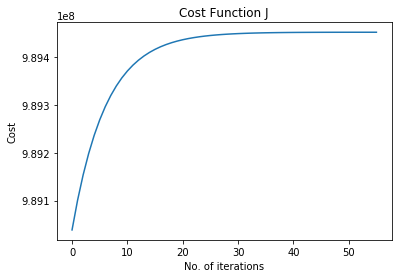

In [8]:
J_history, params = gradient_descent(X,Y,w,learning_rate,n_iter, delta)
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(J_history)
plt.show()

In [9]:
df = pd.read_csv('./house.csv')

m = len(df)
n_features = 3
n_iter = 1000
delta = 0.01
learning_rate = 0.03

w = np.ones((n_features + 1, 1))

X = np.array((np.ones((m)),  df['size'], df['nb_rooms'], df['garden'])).T
Y = df['price'].values

print("Total samples in our dataset is: {}".format(X.shape[0]))

Total samples in our dataset is: 950


In [10]:
gradient_descent(X,Y,w,learning_rate,n_iter, delta)

/Users/romane/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/romane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/romane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


([1209217506275131.2,
  1.8674965723657146e+25,
  1.0822262831167384e+31,
  6.287984055434242e+36,
  3.653451079237598e+42,
  2.1227319806781012e+48,
  1.2333519634009359e+54,
  7.166034522827638e+59,
  4.163616899814681e+65,
  2.419149061199601e+71,
  1.405576526640429e+77,
  8.166695487804684e+82,
  4.7450219839642454e+88,
  2.7569576534261563e+94,
  1.6018504294546879e+100,
  9.307088177997265e+105,
  5.407614141758846e+111,
  3.141937644394674e+117,
  1.825531907876387e+123,
  1.0606724651649964e+129,
  6.162730289759305e+134,
  3.5806760212643815e+140,
  2.0804481400983823e+146,
  1.208784161966839e+152,
  7.023290425075321e+157,
  4.080679574316584e+163,
  2.3709607292889352e+169,
  1.37757809145595e+175,
  8.004018685828489e+180,
  4.650503337736928e+186,
  2.7020403303898204e+192,
  1.569942308783725e+198,
  9.121695280372031e+203,
  5.299896965795052e+209,
  3.0793516977578745e+215,
  1.7891681554722105e+221,
  1.039544359576278e+227,
  6.03997154891034e+232,
  3.5093506088105

/Users/romane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/romane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


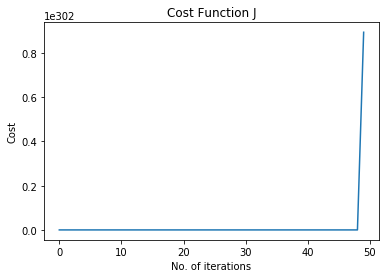

In [11]:
J_history, params = gradient_descent(X,Y,w,learning_rate,n_iter, delta)
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(J_history)
plt.show()